# Amazon Kindle Book Reviews:

## Importing necessary libraries

In [31]:
import pandas as pd
import numpy as np
from ipywidgets import widgets, interactive
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data

In [32]:
df = pd.read_csv("C:/Users/freak/Downloads/kindle_reviews.csv")
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [33]:
df.columns

Index(['Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

## Basic statistics on product, users and reviews

In [34]:
print('Number of unique books:', len(df['asin'].unique()))

Number of unique books: 61934


In [35]:
print('Number of unique users:', len(df['reviewerID'].unique()))

Number of unique users: 68223


In [36]:
print('Estimate of number unique reviews:', len(df['reviewText'].unique()))

Estimate of number unique reviews: 982268


In [37]:
print('Initial size')
df.shape

Initial size


(982619, 10)

## Data Cleaning

### Check for missing data

In [38]:
df.isnull().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

### Droping missing data based on "reviewText"

In [39]:
df = df.dropna(axis=0, subset=['reviewText'])

In [40]:
df.isnull().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText           0
reviewTime           0
reviewerID           0
reviewerName      3816
summary              1
unixReviewTime       0
dtype: int64

## Data pre-processing

### Converting the Unix time to actual time

In [41]:
df['Date'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014-05-05
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2014-01-06
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2014-04-04
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014-02-19
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014-03-19


## Exploratory data analysis

### Percent of Star-Rating Reviews

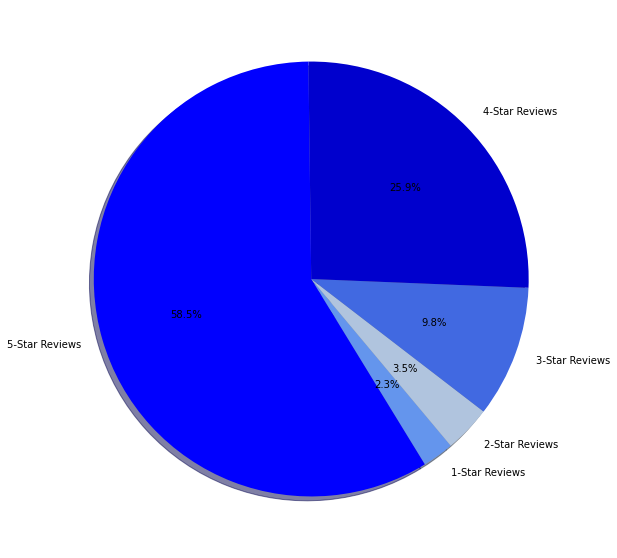

In [55]:
# Breakdown of star-ratings

kindle_group = df.groupby("overall")
kindle_size = kindle_group.size()
labels = ["1-Star Reviews", "2-Star Reviews", "3-Star Reviews", "4-Star Reviews", "5-Star Reviews"]
color = [ "cornflowerblue","lightsteelblue",  "royalblue","mediumblue", "blue"]

plt.figure(figsize=(10, 10))
plt.pie(kindle_size, labels = labels, colors = color, autopct = "%1.1f%%", shadow=True,startangle = 301.5)
plt.title("")
plt.show()

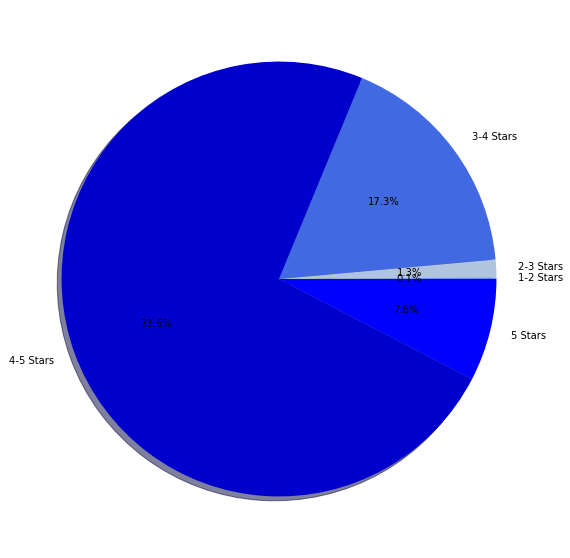

In [54]:
#Breakdown of average score of books

kindle_group = df.groupby("asin")
kindle_avg = kindle_group.mean()
kindle_df = pd.DataFrame(kindle_avg)

bins = [0,1.999,2.999,3.999,4.999,5]
labels = ["1-2 Stars", "2-3 Stars", "3-4 Stars", "4-5 Stars","5 Stars"]
kindle_df["Review Bin"] = pd.cut(kindle_df["overall"], bins, labels = labels, include_lowest = True)
rating_group = kindle_df.groupby("Review Bin").size()

plt.figure(figsize=(10, 10))
color = [ "cornflowerblue","lightsteelblue",  "royalblue","mediumblue", "blue"]
plt.pie(rating_group, labels = labels, colors = color, autopct = "%1.1f%%", shadow=True,startangle = 0)   
plt.show()

### Trend in Review count over years

In [14]:
#creating "Year" attribute in data frame
df['Year'] = df.Date.dt.year

df_review = df[['Year','reviewText']]
df_review = df_review.groupby(['Year']).count().reset_index().rename(columns = {'reviewText':'Counts'})
df_review.head()

,Year,Counts
0,2000,8
1,2001,2
2,2002,1
3,2003,4
4,2004,10


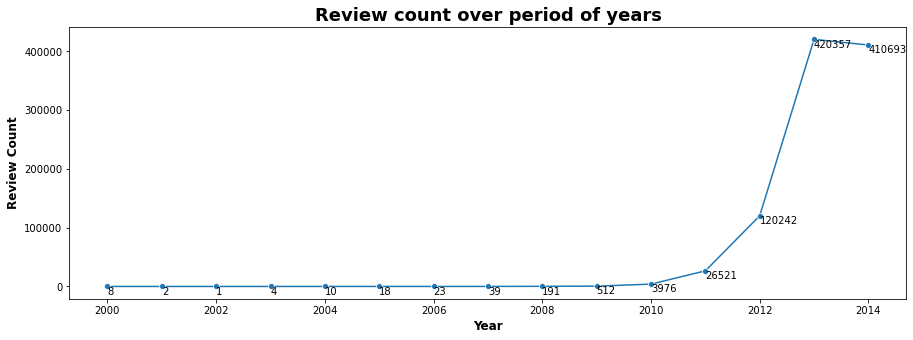

In [15]:
title = 'Review count over period of years'
f,ax = plt.subplots(1, figsize=(15,5))
ax = sns.lineplot(x="Year", y="Counts", marker='o',data=df_review, ci=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_xlabel('Year', fontsize=12, weight = 'bold')
ax.set_ylabel('Review Count', fontsize=12, weight = 'bold')
plt.title(title, fontsize=18, y=1, weight = 'bold')

for x,y,m in df_review[['Year','Counts','Counts']].values:
            ax.text(x,y,f'{m:.0f}',ha = 'left', va = 'top')

plt.show()

### Filtering the data from 2008 to 2015 and selecting only top 15 book id's

In [16]:
df_filtered = df[(df['Year'] > 2007) & (df['Year'] < 2016)]
df_filtered.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date,Year
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014-05-05,2014
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,2014-01-06,2014
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,2014-04-04,2014
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014-02-19,2014
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014-03-19,2014


In [17]:
len(df_filtered)

982492

In [18]:
df_line = df_filtered[['Year','reviewText']]
df_line = df_line.groupby(['Year']).count().reset_index().rename(columns = {'reviewText':'Counts'})
df_line.head()

,Year,Counts
0,2008,191
1,2009,512
2,2010,3976
3,2011,26521
4,2012,120242


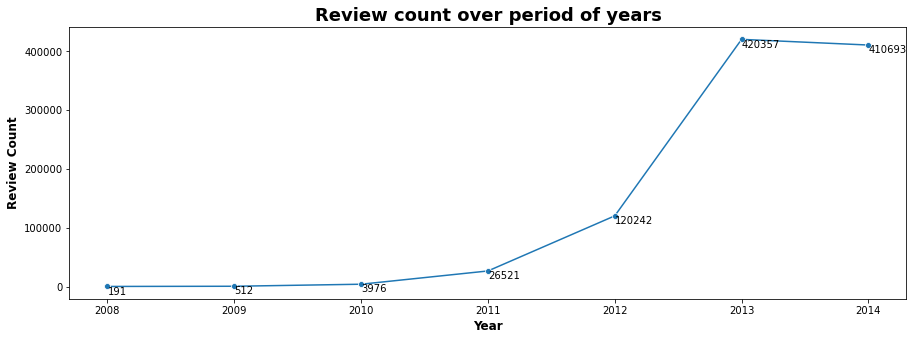

In [19]:
title = 'Review count over period of years'
f,ax = plt.subplots(1, figsize=(15,5))
ax = sns.lineplot(x="Year", y="Counts", marker='o',data=df_line, ci=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_xlabel('Year', fontsize=12, weight = 'bold')
ax.set_ylabel('Review Count', fontsize=12, weight = 'bold')
plt.title(title, fontsize=18, y=1, weight = 'bold')

for x,y,m in df_line[['Year','Counts','Counts']].values:
            ax.text(x,y,f'{m:.0f}',ha = 'left', va = 'top')

plt.show()

### Distribution of count of reviews across Top Books

In [20]:
df_review_products = df_filtered.groupby(['asin']).count()['reviewText'].reset_index().sort_values(by='reviewText',ascending=False)
df_review_products = df_review_products.head(15)
df_review_products.head()

,asin,reviewText
9482,B006GWO5WK,1112
29867,B00BTIDW4S,781
29817,B00BT0J8ZS,516
55191,B00JDYC5OI,502
46283,B00H0V069M,481


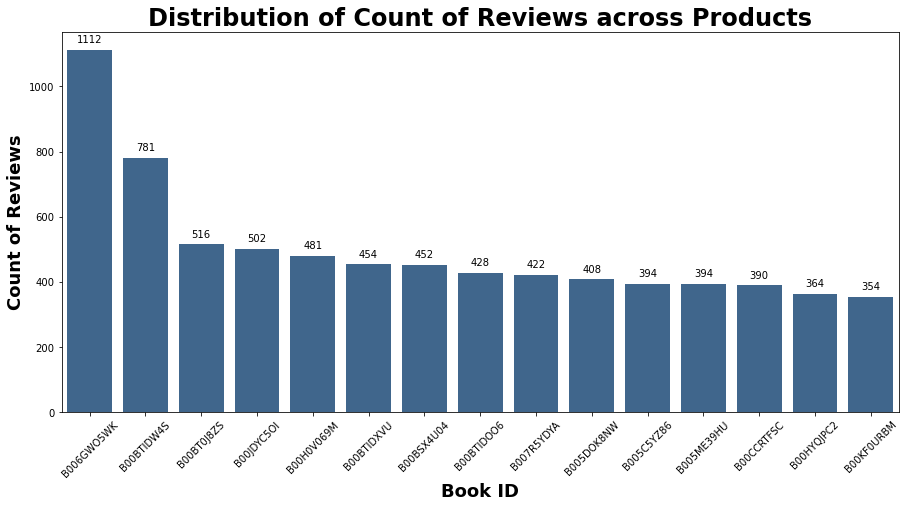

In [21]:
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(x="asin", y="reviewText", data=df_review_products, color=(0.2, 0.4, 0.6, 0.6))
#plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Distribution of Count of Reviews across Products',fontsize=24, y=1, weight = 'bold')
plt.ylabel('Count of Reviews',fontsize=18, weight = 'bold')
plt.xlabel('Book ID',fontsize=18, weight = 'bold')
for p in bar_plot.patches:
    bar_plot.annotate(str(format(p.get_height(), '.0f')), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show();

### Creating a final dataframe with only top 15 Books with maximum reviews

In [22]:
# the final dataframe with all columns of the selected 15 products
df_final = pd.merge(df_filtered, df_review_products,how='inner' ,on = ['asin'])
df_final.head()

,Unnamed: 0,asin,helpful,overall,reviewText_x,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Date,Year,reviewText_y
0,87968,B005C5YZ86,"[0, 0]",3,"I'm not big on ""erotic"" novels, but I was look...","07 14, 2012",A1ETQN0GCYJX8K,"2Gr8KidsMom ""Cat""",Not too bad...,1342224000,2012-07-14,2012,394
1,87969,B005C5YZ86,"[5, 6]",3,This short story tells of the homecoming of ba...,"09 2, 2011",A3EMLZINAUNEBQ,A. A.,Quick easy read,1314921600,2011-09-02,2011,394
2,87970,B005C5YZ86,"[2, 3]",3,This is what happens when a romance that shoul...,"08 28, 2012",A1HPJCVVOZPCKC,Adrienne,Short,1346112000,2012-08-28,2012,394
3,87971,B005C5YZ86,"[1, 1]",4,This book was to the point quick. I was waitin...,"12 11, 2012",A1BDHONNC4NT70,A. Druck,Really short fun read!,1355184000,2012-12-11,2012,394
4,87972,B005C5YZ86,"[0, 0]",1,This is exactly the kind of story my husband a...,"04 2, 2013",A8MTDB180W1XE,"A. Ellison ""real LS costomer""",eh....,1364860800,2013-04-02,2013,394


In [23]:
df_final['asin'].nunique()

15

### Distribution of Avg. score of Reviews across Books

In [24]:
df_avg_review_products = df_final.groupby(['asin']).mean()['overall'].reset_index().sort_values(by='overall',ascending=False)
df_avg_review_products.head()

,asin,overall
4,B007R5YDYA,4.708531
11,B00H0V069M,4.686071
5,B00BSX4U04,4.676991
7,B00BTIDOO6,4.649533
13,B00JDYC5OI,4.641434


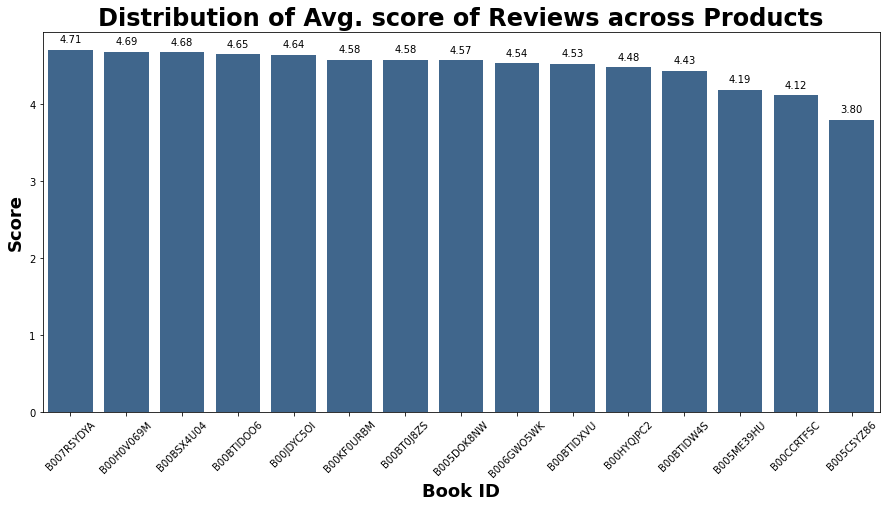

In [25]:
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(x="asin", y="overall", data=df_avg_review_products, color=(0.2, 0.4, 0.6, 0.6))
#plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Distribution of Avg. score of Reviews across Products',fontsize=24, y=1, weight = 'bold')
plt.ylabel('Score',fontsize=18, weight = 'bold')
plt.xlabel('Book ID',fontsize=18, weight = 'bold')
for p in bar_plot.patches:
    bar_plot.annotate(str(format(p.get_height(), '.2f')), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show();

### Total Number of Reviews of Books over the period of Time

In [26]:
reviews_product_years = df_final.groupby(['asin','Year']).count()['reviewText_x'].reset_index().sort_values(by='reviewText_x',ascending=False)
reviews_product_years.head()

,asin,Year,reviewText_x
13,B006GWO5WK,2013,759
24,B00BTIDW4S,2013,642
32,B00JDYC5OI,2014,502
30,B00H0V069M,2014,481
20,B00BT0J8ZS,2013,439


In [27]:
#creating pivoted data for heatmap chart
reviews_product_years = reviews_product_years.pivot(index='asin', columns='Year', values='reviewText_x')
reviews_product_years.head()

Year,2011,2012,2013,2014
asin,,,,
B005C5YZ86,10.0,82.0,236.0,66.0
B005DOK8NW,14.0,97.0,218.0,79.0
B005ME39HU,8.0,199.0,155.0,32.0
B006GWO5WK,NaN,169.0,759.0,184.0
B007R5YDYA,NaN,61.0,239.0,122.0


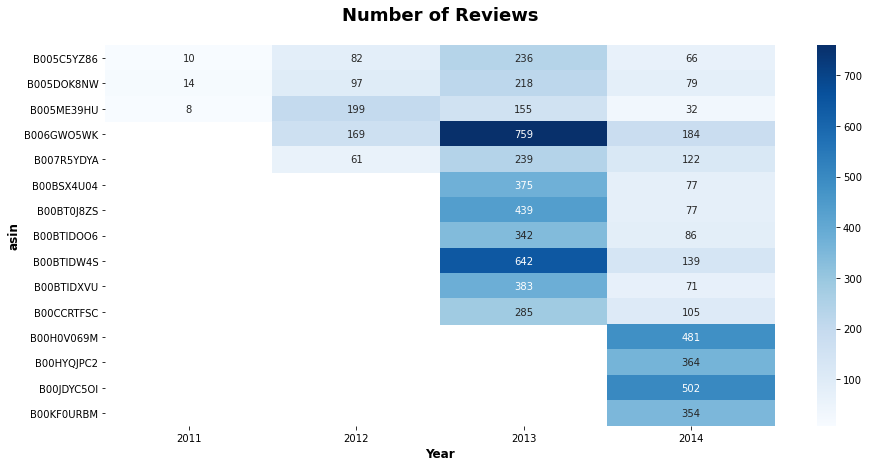

In [28]:
#creating heatmap plot
fig, ax = plt.subplots(figsize = (15,7))
plt.title("Number of Reviews",fontsize=18, y=1, weight = 'bold')
plt.ylabel('Book ID',fontsize=12, weight = 'bold')
plt.xlabel('Year',fontsize=12, weight = 'bold')
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(reviews_product_years,annot=True,cmap='Blues', fmt='g');

### Average Score of Books over the period of Time

In [29]:
#creating pivoted data for heatmap chart
score_product_years = pd.pivot_table(df_final, values='overall', index=['asin'],columns=['Year'], aggfunc=np.mean)
score_product_years.head()

Year,2011,2012,2013,2014
asin,,,,
B005C5YZ86,3.500000,3.792683,3.750000,4.045455
B005DOK8NW,4.285714,4.546392,4.559633,4.696203
B005ME39HU,4.375000,4.190955,4.174194,4.218750
B006GWO5WK,NaN,4.378698,4.574440,4.521739
B007R5YDYA,NaN,4.590164,4.728033,4.729508


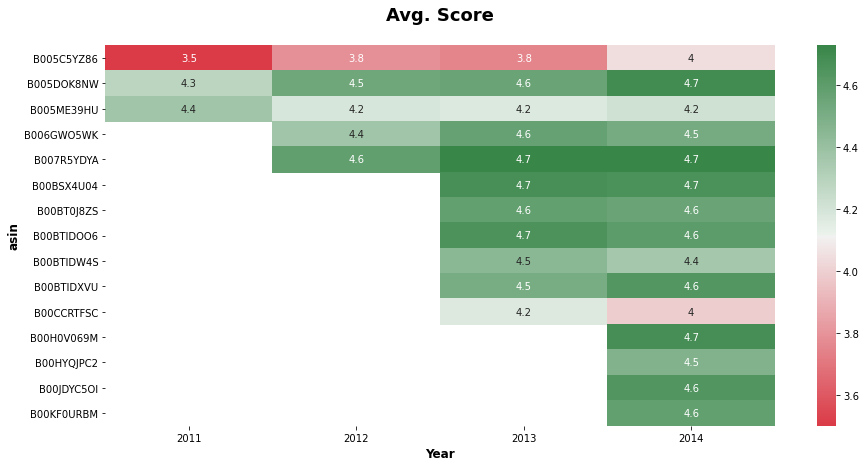

In [30]:
#creating heatmap plot
fig, ax = plt.subplots(figsize = (15,7))
plt.title("Avg. Score",fontsize=18, y=1, weight = 'bold')
plt.ylabel('Book ID',fontsize=12, weight = 'bold')
plt.xlabel('Year',fontsize=12, weight = 'bold')
ttl = ax.title
ttl.set_position([0.5,1.05])

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(score_product_years,annot=True,cmap=cmap, fmt='.2g');